In [120]:
import math
import numpy as np
from sympy import symbols, integrate, simplify, Rational
from IPython.display import display
from sympy.plotting import plot

In [121]:
def value_rounded_str(value):
    val = str(np.round(value,4))
    return val

In [122]:
x = symbols("x")

In [123]:
#### EINGABEWERTE

# Funktion
f = Rational(1,15) - x/450

# Grenzen

lower_bound = 0 # bei Brüchen Rational(5,2)
upper_bound = 30 # bei Brüchen Rational(5,2)

# Wahrscheinlicheiten

p_x = 20

x_oben = 3
x_unten = -3

In [124]:
print("Funktion f (Dichtefunktion) = ")
display(simplify(f))

Funktion f (Dichtefunktion) = 


1/15 - x/450

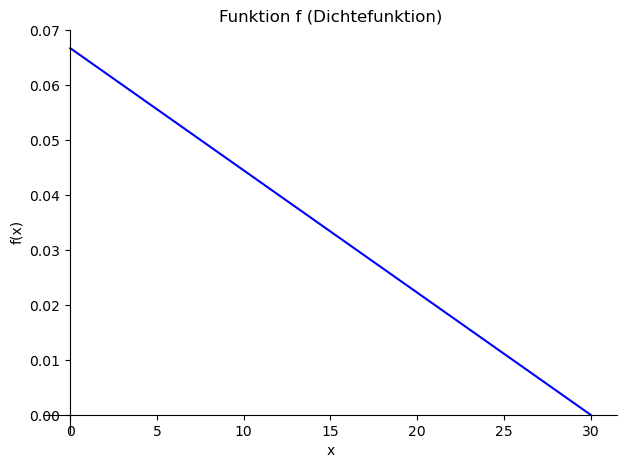

In [125]:
p_f = plot(f, (x, lower_bound, upper_bound), show=False, line_color='blue', title='Funktion f (Dichtefunktion)')
p_f.xlabel = 'x'
p_f.ylabel = 'f(x)'
p_f.show()

In [126]:
# Stammfunktion

F_y = integrate(f, (x, lower_bound, x))
#F_y = Rational(1,2) * x - Rational(5,4)
print("Stammfunktion F (Verteilungsfunktion) der Dichtefunktion f: ")
display(simplify(f))
print("=")
display(simplify(F_y))

Stammfunktion F (Verteilungsfunktion) der Dichtefunktion f: 


1/15 - x/450

=


x*(60 - x)/900

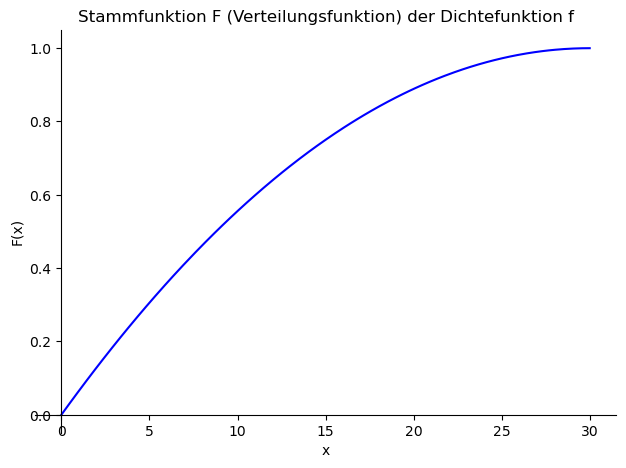

In [127]:
p_F = plot(F_y, (x, lower_bound, upper_bound), show=False, line_color='blue', title='Stammfunktion F (Verteilungsfunktion) der Dichtefunktion f')
p_F.xlabel = 'x'
p_F.ylabel = 'F(x)'
p_F.show()

In [128]:
# Erwartungswert

mean_f = x * f
F_mean_f = integrate(mean_f, x)
E = F_mean_f.subs(x, upper_bound) - F_mean_f.subs(x, lower_bound)

try:
    print("Erwartungswert = ", Rational(E), "bzw.", E)
except:
    print("Erwartungswert = ", E)

Erwartungswert =  10 bzw. 10


In [129]:
# Varianz
f_x2 = (x**2) * f
F_x2 = integrate(f_x2, x)
print("Stammfunktion von")
display(simplify(f_x2))
print("=")
display(simplify(F_x2))

E_x2 = F_x2.subs(x, upper_bound) - F_x2.subs(x, lower_bound)

E_2 = E**2
var = E_x2 - E_2

try:
    print("E(x**2) = ", Rational(E_x2), "bzw.", E_x2)
    print("E(x)**2 = ", Rational(E_2), "bzw.", E_2)
    print("Varianz = E(x**2) - E(x)**2 = ", Rational(var), "bzw.", var)
except:
    print("E(x**2) = ", E_x2)
    print("E(x)**2 = ", E_2)
    print("Varianz = E(x**2) - E(x)**2 = ", var)

Stammfunktion von


x**2*(30 - x)/450

=


x**3*(40 - x)/1800

E(x**2) =  150 bzw. 150
E(x)**2 =  100 bzw. 100
Varianz = E(x**2) - E(x)**2 =  50 bzw. 50


In [130]:
# Standardabweichung

sigma_x = math.sqrt(var)
print("Standardabweichung = sqrt(var) = ", value_rounded_str(sigma_x), "bzw.", Rational(sigma_x))

Standardabweichung = sqrt(var) =  7.0711 bzw. 124395540479019/17592186044416


In [131]:
# Wahrscheinlichkeit P(X<=x)
p_kleinergleich = F_y.subs(x, p_x)
print("P(X<=" + str(p_x) + ") = " + str(p_kleinergleich))
print("1 - P(X<=" + str(p_x) + ") = " + str(1 - p_kleinergleich))

P(X<=20) = 8/9
1 - P(X<=20) = 1/9


In [132]:
# Wahrscheinlichkeit P(x_unten<=X<=x_oben)
p_kleinergleich_oben = F_y.subs(x, x_oben)
p_kleinergleich_unten = F_y.subs(x, x_unten)
print("P(X<=" + str(x_oben) + ") = " + str(p_kleinergleich_oben))
print("P(X<=" + str(x_unten) + ") = " + str(p_kleinergleich_unten))
print("P(" + str(x_unten) + "<=X<=" + str(x_oben) + ") = " + str(p_kleinergleich_oben - p_kleinergleich_unten))

P(X<=3) = 19/100
P(X<=-3) = -21/100
P(-3<=X<=3) = 2/5
